# Importing the libraries


In [1]:
import numpy as np 
import pandas as pd

from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy
from gensim.models.ldamulticore import LdaMulticore
import re


from gensim.models import Phrases
from gensim.models.phrases import Phraser

# GSDMM

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('/Users/ideakadikoy/Desktop/lemma_all_entries_df3.csv', encoding='utf-8')
data.head()

,Unnamed: 0,Entry,Author,Date,Old_Topic,New_Topic,Edited,Entry_Date,Edit_Date,date,sents,sents_lemma,Tweets_tok,entries_tok,cat
0,0,arife gunu yarim gun mesaisini yapmami tembel ...,ssg,21.02.2002 12:03 ~ 12:03,kadıköy belediyesi,kadıköy belediyesi,True,2002-02-21,2022-09-19 12:03:00,2002-02-21,arife gunu yarim gun mesaisini yapmami tembel ...,arif Gun yâr Gun mesai yapmami tembel beledi m...,"['arife', 'gunu', 'yarim', 'gun', 'mesaisini',...","['arife', 'gunu', 'yarim', 'gun', 'mesaisini',...","['arife', 'gunu', 'yarim', 'gun', 'mesaisini',..."
1,1,sorumluluklarin sini yerine getirse kadikoyu d...,deadpoem,11.01.2003 16:24,kadıköy belediyesi,kadıköy belediyesi,False,2003-11-01,NaN,2003-11-01,sorumluluklarin sini getirse kadikoyu sevecen ...,sorumluluklarin sini getirmek kadikoyu sevecen...,"['sorumluluklarin', 'sini', 'getirse', 'kadiko...","['sorumluluklarin', 'sini', 'getirse', 'kadiko...","['sorumluluklarin', 'sini', 'getirse', 'kadiko..."
2,2,sağa sola kent yaşamının gerçek sahibi yayalar...,melancholyman,01.02.2003 02:10 ~ 02:12,kadıköy belediyesi,kadıköy belediyesi,True,2003-01-02,2022-09-19 02:12:00,2003-01-02,sağa sola kent yaşamının gerçek sahibi yayalar...,sağ sol kent yaşam gerçek sahip Yay yazmak baş...,"['sağa', 'sola', 'kent', 'yaşamının', 'gerçek'...","['sağa', 'sola', 'kent', 'yaşamının', 'gerçek'...","['sağa', 'sola', 'kent', 'yaşamının', 'gerçek'..."
3,3,bkz kadikoy afet kriz merkezi,mercan,21.03.2003 18:46,kadıköy belediyesi,kadıköy belediyesi,False,2003-03-21,NaN,2003-03-21,kadikoy afet kriz merkezi,kadikoy afet kriz merkez,"['kadikoy', 'afet', 'kriz', 'merkezi']","['kadikoy', 'afet', 'kriz', 'merkezi']","['kadikoy', 'afet', 'kriz', 'merkezi']"
4,4,internet sitesinde sahipsiz kedi ve köpekler i...,sai baba,03.08.2004 00:17,kadıköy belediyesi,kadıköy belediyesi,False,2004-03-08,NaN,2004-03-08,internet sitesinde sahipsiz kedi köpekler bölü...,İnternet site sahip kedi köpek bölüm olanistey...,"['internet', 'sitesinde', 'sahipsiz', 'kedi', ...","['internet', 'sitesinde', 'sahipsiz', 'kedi', ...","['internet', 'sitesinde', 'sahipsiz', 'kedi', ..."


In [4]:
data['review_list'] = data.sents.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

In [5]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [6]:
tokens_reviews = list(sent_to_words(data['review_list']))


In [7]:
tokens_reviews[0]

['arife',
 'gunu',
 'yarim',
 'gun',
 'mesaisini',
 'yapmami',
 'tembel',
 'belediye',
 'modeli',
 'binasi',
 'hasanpaadadir']

In [8]:
tokens_reviews = make_n_grams(tokens_reviews)


In [9]:
np.random.seed(0) #for reproducability


In [10]:
mgp = MovieGroupProcess(K=15, alpha=0.01, beta=0.01, n_iters=30) 

vocab = set(x for review in tokens_reviews for x in review)
n_terms = len(vocab)
model = mgp.fit(tokens_reviews, n_terms)

In stage 0: transferred 17352 clusters with 15 clusters populated
In stage 1: transferred 9560 clusters with 15 clusters populated
In stage 2: transferred 4413 clusters with 15 clusters populated
In stage 3: transferred 2707 clusters with 15 clusters populated
In stage 4: transferred 2121 clusters with 15 clusters populated
In stage 5: transferred 1911 clusters with 15 clusters populated
In stage 6: transferred 1820 clusters with 15 clusters populated
In stage 7: transferred 1676 clusters with 15 clusters populated
In stage 8: transferred 1613 clusters with 15 clusters populated
In stage 9: transferred 1543 clusters with 15 clusters populated
In stage 10: transferred 1506 clusters with 15 clusters populated
In stage 11: transferred 1511 clusters with 15 clusters populated
In stage 12: transferred 1508 clusters with 15 clusters populated
In stage 13: transferred 1445 clusters with 15 clusters populated
In stage 14: transferred 1441 clusters with 15 clusters populated
In stage 15: transf

In [11]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [64]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 15)

Number of documents per topic : [  257   304   362   608   290   675  1194   375   358   454   445   588
   383   454 13495]

Most important clusters (by number of docs inside): [14  6  5  3 11 13  9 10 12  7]

Cluster 14 : [('kadıköy', 2329), ('güzel', 1931), ('yer', 1487), ('bi', 1186), ('zaman', 1127), ('moda', 1052), ('insan', 1027), ('iyi', 1020), ('insanlar', 1015), ('sadece', 965), ('aynı', 889), ('başka', 852), ('tek', 828), ('büyük', 808), ('son', 807)]

Cluster 6 : [('cok', 186), ('icin', 175), ('bi', 129), ('kadikoy', 120), ('yer', 110), ('guzel', 98), ('semt', 70), ('iyi', 67), ('degil', 56), ('zaman', 52), ('su', 51), ('artik', 51), ('moda', 50), ('tek', 49), ('insan', 45)]

Cluster 5 : [('nan', 125), ('kadıköy', 94), ('yer', 31), ('beşiktaş', 28), ('güzel', 25), ('moda', 22), ('semt', 19), ('bi', 17), ('kadıköyün', 17), ('amk', 17), ('kaymak', 17), ('iyi', 16), ('ev', 16), ('lan', 14), ('zaman', 13)]

Cluster 3 : [('kadıköy', 202), ('beşiktaş', 49), ('güzel', 35), ('yer',

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [22]:
# We didn`t rename the clusters

topic_dict = {}
topic_names = ['type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
               "type 7",
               "type 8",
               "type 9",
               "type 10",
               "type 11",
               "type 12",
               "type 13",
               "type 14",
               "type 15"
               
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [23]:
def create_topics_dataframe(data_text=data.sents,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_reviews):
    result = pd.DataFrame(columns=['Text', 'Topic', 'Rating', 'Lemma-text'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        #result.at[i, 'Rating'] = data.Rating[i]
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(tokens_reviews[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [24]:
result = create_topics_dataframe(data_text=data.sents, mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_reviews)
result.head(5)

,Text,Topic,Rating,Lemma-text
0,arife gunu yarim gun mesaisini yapmami tembel ...,type 2,NaN,"[arife, gunu, yarim, gun, mesaisini, yapmami, ..."
1,sorumluluklarin sini getirse kadikoyu sevecen ...,type 2,NaN,"[sorumluluklarin, sini, getirse, kadikoyu, sev..."
2,sağa sola kent yaşamının gerçek sahibi yayalar...,type 1,NaN,"[sağa_sola, kent, yaşamının, gerçek, sahibi, y..."
3,kadikoy afet kriz merkezi,type 1,NaN,"[kadikoy, afet, kriz, merkezi]"
4,internet sitesinde sahipsiz kedi köpekler bölü...,type 1,NaN,"[internet, sitesinde, sahipsiz, kedi, köpekler..."


In [65]:
import plotly.express as px

fig = px.pie(result, names='Topic',  title='Topics', color_discrete_sequence=px.colors.sequential.Burg)
plt.savefig('gdsm.jpeg',dpi=500)

fig.show()


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 432x288 with 0 Axes>

In [26]:
result['len'] = result.Text.apply(lambda x: x.split() if type(x) == str else x)

In [32]:
import matplotlib.pyplot as plt

In [ ]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [ ]:
result = result.drop('Lemma-text', axis=1)


In [35]:
from wordcloud import WordCloud 


In [36]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



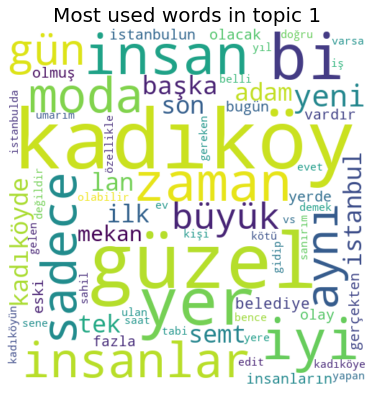

<Figure size 432x288 with 0 Axes>

In [73]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 1'], title="Most used words in topic 1")
plt.savefig('dominant1.png',dpi=500)


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



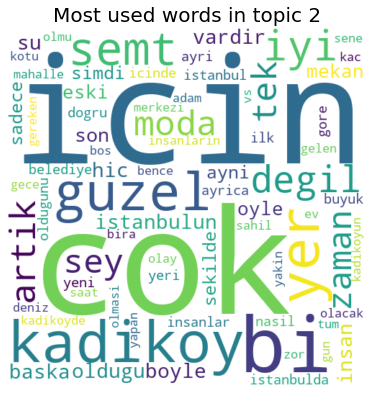

<Figure size 432x288 with 0 Axes>

In [67]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 2'], title="Most used words in topic 2")
plt.savefig('dominant2.jpeg',dpi=500)


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



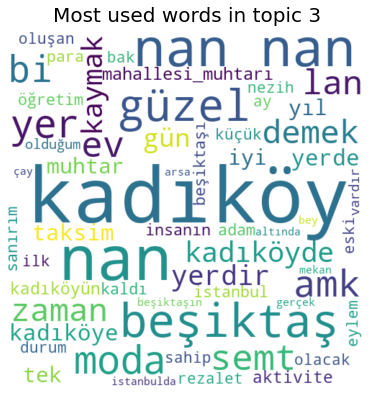

<Figure size 432x288 with 0 Axes>

In [68]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 3'], title="Most used words in topic 3")
plt.savefig('dominant3.jpeg',dpi=500)


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



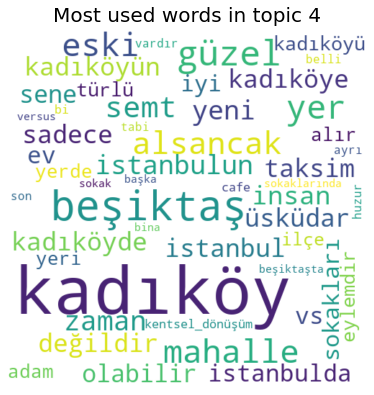

<Figure size 432x288 with 0 Axes>

In [69]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 4'], title="Most used words in topic 4")
plt.savefig('dominant4.jpeg',dpi=500)


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



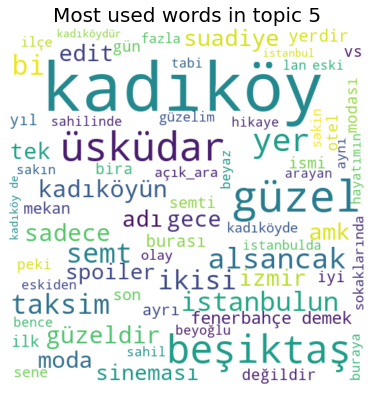

<Figure size 432x288 with 0 Axes>

In [70]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 5'], title="Most used words in topic 5")
plt.savefig('dominant5.jpeg',dpi=500)


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



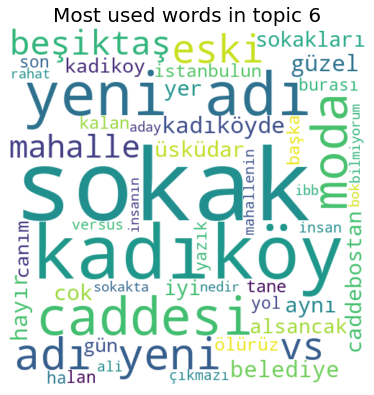

<Figure size 432x288 with 0 Axes>

In [71]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 6'], title="Most used words in topic 6")
plt.savefig('dominant6.jpeg',dpi=500)


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



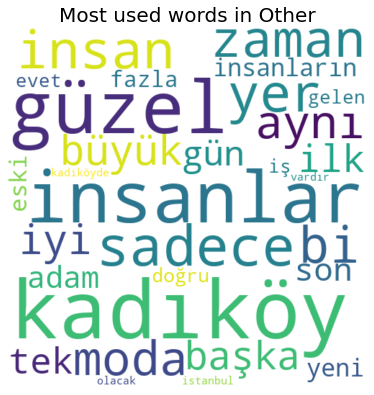

<Figure size 432x288 with 0 Axes>

In [72]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'Other'], title="Most used words in Other")
plt.savefig('dominantother.jpeg',dpi=500)


# LDA Multicore

In [44]:
id2word = corpora.Dictionary(tokens_reviews)
texts = tokens_reviews
corpus = [id2word.doc2bow(text) for text in texts]

In [45]:
# Use TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [46]:
from gensim.models.ldamulticore import LdaMulticore

def calc_coherence_values(dictionary, corpus, texts, limit = 15, start = 1, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, alpha=0.2, eta=0.3, random_state = 58) #These alpha and beta values were changed after the GridSearchCV. 
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus_tfidf, texts = texts, start = 5, limit = 30, step = 2)


model created
0.3132044831174602
model created
0.33724816401539676
model created
0.28869866594534777
model created
0.3120887506957286
model created
0.31200545494469745
model created
0.3057836936700845
model created
0.31940314137872744
model created
0.37697254234733835
model created
0.3018062659500418
model created
0.31580841395967757
model created
0.3711282785538132
model created
0.3100659867222532
model created
0.3170249142338093


# LDA Multicore GridSearchCV


In [47]:
!pip install GridSearchCV

ERROR: Could not find a version that satisfies the requirement GridSearchCV
ERROR: No matching distribution found for GridSearchCV


Finding the necesssary alpha and eta for LDAMulticore. 


In [48]:
def calculate_coherence_score(n, alpha, beta):
    ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokens_reviews, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

#list containing various hyperparameters
no_of_topics = [14,18,20]
alpha_list = ['symmetric',0.2,0.3,0.4]
beta_list = ['auto',0.2,0.3,0.4]


for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            coherence_score = calculate_coherence_score(n, alpha, beta)
            print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Score : {coherence_score}")

n : 14 ; alpha : symmetric ; beta : auto ; Score : 0.4315700596726402
n : 14 ; alpha : symmetric ; beta : 0.2 ; Score : 0.4328830654317465
n : 14 ; alpha : symmetric ; beta : 0.3 ; Score : 0.5003199101656756
n : 14 ; alpha : symmetric ; beta : 0.4 ; Score : 0.5386066091103459
n : 14 ; alpha : 0.2 ; beta : auto ; Score : 0.4323609633459712
n : 14 ; alpha : 0.2 ; beta : 0.2 ; Score : 0.4163936583759841
n : 14 ; alpha : 0.2 ; beta : 0.3 ; Score : 0.4564791920545607
n : 14 ; alpha : 0.2 ; beta : 0.4 ; Score : 0.5411856961364029
n : 14 ; alpha : 0.3 ; beta : auto ; Score : 0.420158575700676
n : 14 ; alpha : 0.3 ; beta : 0.2 ; Score : 0.4381759718414281
n : 14 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.44010623462547205
n : 14 ; alpha : 0.3 ; beta : 0.4 ; Score : 0.5323133200651398
n : 14 ; alpha : 0.4 ; beta : auto ; Score : 0.40833522294182417
n : 14 ; alpha : 0.4 ; beta : 0.2 ; Score : 0.455497442180882
n : 14 ; alpha : 0.4 ; beta : 0.3 ; Score : 0.47877506458816577
n : 14 ; alpha : 0.4 ; bet

In [49]:
import matplotlib.pyplot as plt


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



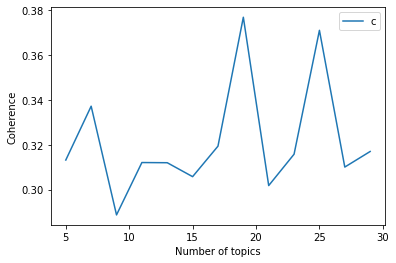

In [75]:
limit, start, step = 30, 5, 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.savefig('ldaöd.jpeg',dpi=500)
plt.show() #20 is the best number of topics. Cohrenece Scores are still bad. We might try other techniques to fix this.

In [77]:
index = coherence_values.index(max(coherence_values))
model_list[index].show_topics()

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(17,
  '0.000*"kadıköy" + 0.000*"güzel" + 0.000*"mangal" + 0.000*"semt" + 0.000*"yer" + 0.000*"evim" + 0.000*"bi" + 0.000*"mahalle" + 0.000*"semtlerinden" + 0.000*"burası"'),
 (8,
  '0.000*"güzel" + 0.000*"suadiye" + 0.000*"semti" + 0.000*"semt" + 0.000*"kadıköy" + 0.000*"iyi" + 0.000*"yer" + 0.000*"kadıköyün" + 0.000*"bi" + 0.000*"yıl"'),
 (14,
  '0.000*"güzel" + 0.000*"kadıköy" + 0.000*"bisiklet" + 0.000*"cadde" + 0.000*"gün" + 0.000*"evler" + 0.000*"hikaye" + 0.000*"sahil" + 0.000*"iş" + 0.000*"yer"'),
 (7,
  '0.000*"eski" + 0.000*"kadıköy" + 0.000*"semt" + 0.000*"bi" + 0.000*"yer" + 0.000*"halüsinasyon" + 0.000*"lan" + 0.000*"denize" + 0.000*"suriyeliler" + 0.000*"yeni"'),
 (13,
  '0.000*"bi" + 0.000*"güzel" + 0.000*"fikirtepe" + 0.000*"yer" + 0.000*"kadıköy" + 0.000*"semt" + 0.000*"matrix" + 0.000*"kısa_film" + 0.000*"sadece" + 0.000*"lan"'),
 (2,
  '0.001*"kadıköy" + 0.000*"semt" + 0.000*"beşiktaş" + 0.000*"güzel" + 0.000*"cok" + 0.000*"dere" + 0.000*"sadece" + 0.000*"bi" + 0.00

In [ ]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model_list[index], corpus_tfidf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)

In [53]:
def format_topics_sentences(lda_model, corpus, data):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
df_topic_sents_keywords = format_topics_sentences(model_list[index], corpus_tfidf, texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4734,"nan, sokak, suriyeli, iyi, tren, güzel, kadıkö...","[arife, gunu, yarim, gun, mesaisini, yapmami, ..."
1,1,11.0,0.4638,"kadıköy, güzel, bi, yer, bence, semt, bulunduğ...","[sorumluluklarin, sini, getirse, kadikoyu, sev..."
2,2,11.0,0.4863,"kadıköy, güzel, bi, yer, bence, semt, bulunduğ...","[sağa_sola, kent, yaşamının, gerçek, sahibi, y..."
3,3,17.0,0.3654,"kadıköy, güzel, mangal, semt, yer, evim, bi, m...","[kadikoy, afet, kriz, merkezi]"
4,4,14.0,0.4874,"güzel, kadıköy, bisiklet, cadde, gün, evler, h...","[internet, sitesinde, sahipsiz, kedi, köpekler..."
5,5,5.0,0.5036,"sahil, güzel, dayak, caddebostan, kadıköydeki_...","[binanın, yangın, tutun, rengine, girişine, dı..."
6,6,15.0,0.5604,"güzel, arsa, kadıköy, sigaralar, iyi, muhtar, ...","[çakal, çalışanlar, barındıran, belediye, bele..."
7,7,8.0,0.6440,"güzel, suadiye, semti, semt, kadıköy, iyi, yer...","[aydın, görüntüsü, vermeye, çalışan, taşra, zi..."
8,8,17.0,0.6045,"kadıköy, güzel, mangal, semt, yer, evim, bi, m...","[kozyatagı, sakaci, sokak, girisinde, modern, ..."
9,9,5.0,0.6701,"sahil, güzel, dayak, caddebostan, kadıköydeki_...","[sabah, sabah, caddeden, geçen, gümbür, gümbür..."


In [55]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
sent_topics_sorteddf_mallet.head(24)

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8156,"güzel, erenköy, yer, kadıköy, fikirtepe, istan...","[pilot, yüzbaşı, cengiz, topel, cumhuriyet, dö..."
1,1.0,0.7795,"nan, sokak, suriyeli, iyi, tren, güzel, kadıkö...","[not, bunlari, yilda, fazla, bara, giden, fazl..."
2,2.0,0.7519,"kadıköy, semt, beşiktaş, güzel, cok, dere, sad...","[basligi, acanin, aktroll, oldugu, niyeti, hev..."
3,3.0,0.7371,"yer, güzel, iyi, kadıköy, zaman, ev, beton, oy...","[başlığı, kadıköy, deki, rezalet, kentsel_dönü..."
4,4.0,0.8139,"güzel, kadıköy, semt, zaman, oldugunu, moda, o...","[simdi, oncelikle, basligi, cok, masum, bulmad..."
5,5.0,0.7914,"sahil, güzel, dayak, caddebostan, kadıköydeki_...","[edit, çeşitli, çevrelerce, dile, getirilen, d..."
6,6.0,0.7407,"kadıköy, güzel, yer, tl, hayret, nezih, adı, b...","[fark, ettiğim, acı, gerçek, dün_akşam, namazı..."
7,7.0,0.7515,"eski, kadıköy, semt, bi, yer, halüsinasyon, la...","[fiyata, gore, guzel, ev, pazarlikla, inebilir..."
8,8.0,0.7376,"güzel, suadiye, semti, semt, kadıköy, iyi, yer...","[insanlar, bence, son, derce, haklı, infial, e..."
9,9.0,0.7534,"döneminde_gerçekleşmiştir, kadıköy, adı, güzel...","[entry, lerin, tamamına, okudum, başlıkta, yaz..."
